
### Homework: Clustering Analysis on a Customers Dataset
Consider that you possess a dataset of customer information, and your task is to perform customer segmentation on this historical data. Customer segmentation involves dividing a customer base into distinct groups based on shared characteristics. This approach is crucial because it allows a business to target specific groups effectively and optimize the allocation of marketing resources. For instance, one segment might consist of high-profit, low-risk customers—those more likely to make purchases or subscribe to services, whom the business aims to retain. Another segment could be customers from non-profit organizations, among others.

In this assignment, you will perform clustering analysis on the Mall Customers Dataset. This dataset includes the `Age`, `Annual Income`, and `Spending Score` of customers. You will use K-Means and DBSCAN clustering algorithms to segment customers based on their behaviors and traits. The primary objective is to understand customer segments to tailor marketing strategies effectively.

---

#### Step 1: Data Loading and Initial Exploration

**Exercise 1:**
- Load the Mall Customers dataset from the following URL: 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'.
- Use pandas to read the data and display the first few rows. 
- Generate basic statistics of the data using `.describe()`.


In [1]:
import pandas as pd
import io
import requests

# Load the data
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'

s = requests.get(url).content # getting the file
df = pd.read_csv(io.StringIO(s.decode('utf-8')))
# Write your code here
print(df.head(10))

df.describe()




   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   
5            6   40    1              23      81      0.998       7.831   
6            7   38    2               4      56      0.442       0.454   
7            8   42    3               0      64      0.279       3.945   
8            9   26    1               5      18      0.575       2.215   
9           10   47    3              23     115      0.653       3.947   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


#### Step 2: Data Preprocessing

**Exercise 2:**
- As observed, the "Address" field in this dataset is a categorical variable. The k-means algorithm, which relies on Euclidean distance, isn't suitable for categorical data because this type of distance measure doesn't make sense for discrete variables. Therefore, exclude this feature and proceed with the clustering analysis.
- Now  normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.





In [2]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# drop adress as it is not needed
df = df.drop(columns=['Address', 'Defaulted', 'Customer Id'])
df.describe().round(3)

X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X) # normalize the dataset

#### Step 3: Applying K-Means Clustering

**Exercise 3:**
- Apply K-Means clustering on the processed data. Choose a suitable number of clusters (start with `k=3`).
- Fit the model and then predict the cluster labels.
- Add these labels as a new column in the DataFrame and create a new DataFrame.
- Calculate the centroid value of each class.



In [3]:
from sklearn.cluster import KMeans
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Initialize the KMeans model
kmeans.fit(Clus_dataSet)  # Fit the model to the data

# Get the cluster labels and add them to the original DataFrame
labels = kmeans.labels_
df['cluster'] = labels  # Add the cluster labels as a new column

# Create a new DataFrame with the cluster labels
new_df = df.copy()
print("\nDataFrame with Cluster Labels:")
print(new_df.head(10)) # print 10 rows

# Calculate the centroid values for each cluster
centroid_values = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns[1:-1])  # Exclude 'cluster' column
print("\nCentroid values for each cluster:")
print(centroid_values)


DataFrame with Cluster Labels:
   Age  Edu  Years Employed  Income  Card Debt  Other Debt  DebtIncomeRatio  \
0   41    2               6      19      0.124       1.073              6.3   
1   47    1              26     100      4.582       8.218             12.8   
2   33    2              10      57      6.111       5.802             20.9   
3   29    2               4      19      0.681       0.516              6.3   
4   47    1              31     253      9.308       8.908              7.2   
5   40    1              23      81      0.998       7.831             10.9   
6   38    2               4      56      0.442       0.454              1.6   
7   42    3               0      64      0.279       3.945              6.6   
8   26    1               5      18      0.575       2.215             15.5   
9   47    3              23     115      0.653       3.947              4.0   

   cluster  
0        2  
1        0  
2        0  
3        2  
4        0  
5        1  
6      

**Exercise 4:**
- Plot the results using a scatter plot. Use `Age` as the x-axis and `Income` as the y-axis. Color the points based on the cluster labels.
- Interpret the plot. What does each cluster seem to represent in terms of customer behavior?


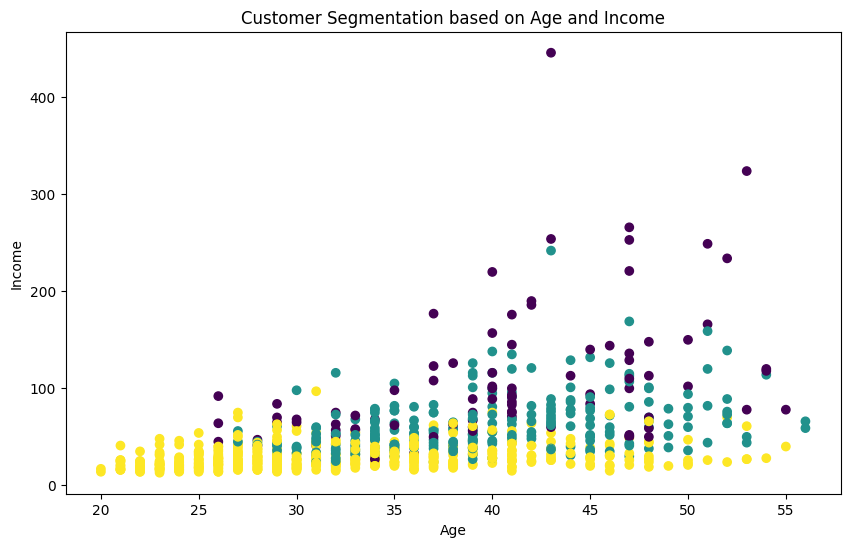

In [4]:
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Scatter plot of Age vs Income, colored by cluster
scatter = plt.scatter(new_df['Age'], new_df['Income'], c=new_df['cluster'], cmap='viridis')
plt.xlabel('Age')                                               # xlabel
plt.ylabel('Income')                                            # y label
plt.title('Customer Segmentation based on Age and Income')         
plt.show()                                                      # execute
import matplotlib.pyplot as plt



#### Step 4: Applying DBSCAN Clustering

**Exercise 5:**
- Apply DBSCAN to the same dataset. Start with `eps=0.5` and `min_samples=5`.
- Fit the model and then predict the cluster labels.
- Determine the count of predicted classes. Adjust 'eps' and 'min_samples' to attain a total of three classes.
- Add these labels as a new column in your DataFrame and create a new DataFrame.

In [5]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN 
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Initialize DBSCAN with default values
dbscan_labels = dbscan.fit_predict(Clus_dataSet)  # Fit and predict cluster labels

#Check the number of unique clusters 
unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
print("Initial clusters and their counts:")
print(dict(zip(unique_labels, counts)))

# Adjusting eps and min_samples to achieve three distinct clusters
# Trying to find suitable eps and min_samples values for 3 clusters

# Updating DBSCAN parameters to get three clusters
dbscan = DBSCAN(eps=0.6, min_samples=4)
dbscan_labels = dbscan.fit_predict(Clus_dataSet)

#Adding the labels to the df
df['dbscan_cluster'] = dbscan_labels
df_dbscan2 = df.copy()

# Displaying the clusters and their counts for verification
unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
print("\nAdjusted clusters and their counts:")
print(dict(zip(unique_labels, counts)))

# Displaying the updated DataFrame with DBSCAN labels
df_dbscan2.head(10)


Initial clusters and their counts:
{np.int64(-1): np.int64(354), np.int64(0): np.int64(120), np.int64(1): np.int64(315), np.int64(2): np.int64(23), np.int64(3): np.int64(11), np.int64(4): np.int64(5), np.int64(5): np.int64(6), np.int64(6): np.int64(5), np.int64(7): np.int64(5), np.int64(8): np.int64(3), np.int64(9): np.int64(3)}

Adjusted clusters and their counts:
{np.int64(-1): np.int64(268), np.int64(0): np.int64(159), np.int64(1): np.int64(363), np.int64(2): np.int64(25), np.int64(3): np.int64(17), np.int64(4): np.int64(6), np.int64(5): np.int64(5), np.int64(6): np.int64(4), np.int64(7): np.int64(3)}


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio,cluster,dbscan_cluster
0,41,2,6,19,0.124,1.073,6.3,2,0
1,47,1,26,100,4.582,8.218,12.8,0,-1
2,33,2,10,57,6.111,5.802,20.9,0,-1
3,29,2,4,19,0.681,0.516,6.3,2,0
4,47,1,31,253,9.308,8.908,7.2,0,-1
5,40,1,23,81,0.998,7.831,10.9,1,-1
6,38,2,4,56,0.442,0.454,1.6,2,0
7,42,3,0,64,0.279,3.945,6.6,2,-1
8,26,1,5,18,0.575,2.215,15.5,2,1
9,47,3,23,115,0.653,3.947,4.0,1,-1


**Exercise 6:**
- Plot the results using the same scatter plot setup as in Exercise 4.
- Compare the results with K-Means. How does DBSCAN differ in terms of cluster formation?

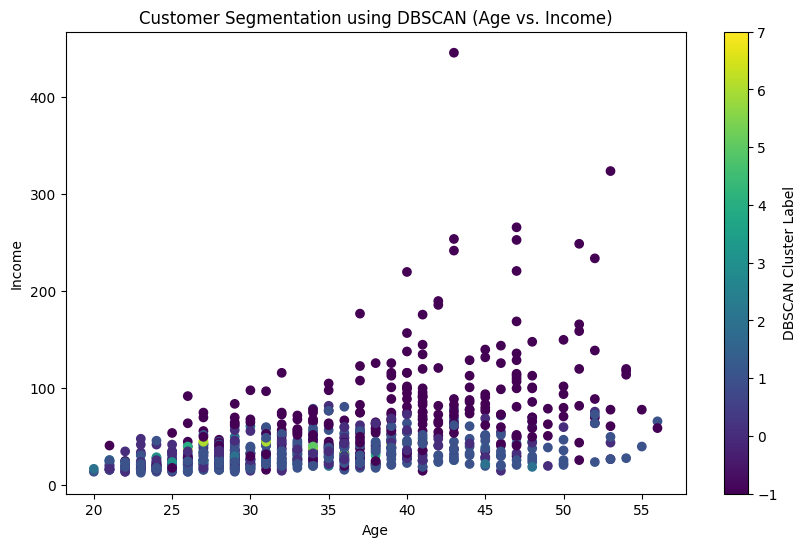

In [6]:
import matplotlib.pyplot as plt

# Plot DBSCAN Clustering Results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Age'], df['Income'], c=df['dbscan_cluster'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Customer Segmentation using DBSCAN (Age vs. Income)')
plt.colorbar(scatter, label='DBSCAN Cluster Label')
plt.show()

#### Step 5: Evaluation and Interpretation

**Exercise 7:**
- Calculate and compare the silhouette scores for both K-Means and DBSCAN.
- Discuss the strengths and weaknesses of each clustering method based on the dataset and the results obtained.

In [7]:
from sklearn.metrics import silhouette_score

# silhouette score calculation for K-Means
kmeans_sil = silhouette_score(Clus_dataSet, df['cluster'])

print(f"K-Means Silhouette Score: {kmeans_sil:.3f}")

# Calculate silhouette score for DBSCAN
dbscan_filtered = Clus_dataSet[df['dbscan_cluster'] != -1] # Filter out noise points (-1) for DBSCAN score
dbscan_filtered_labels = df['dbscan_cluster'][df['dbscan_cluster'] != -1] # filtered labels
dbscan_sil = silhouette_score(dbscan_filtered, dbscan_filtered_labels)
print(f"DBSCAN Silhouette Score: {dbscan_sil:.3f}")

K-Means Silhouette Score: 0.233
DBSCAN Silhouette Score: 0.122




#### Submission Instructions
Please submit your finished Jupyter Notebook with all exercises fully completed. Make sure to include comments in your code cells to clarify your thought process and results. Below each corresponding exercise, add your discussions in a "Markdown" section within this file.
